In [2]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from tqdm import tqdm
from scipy.integrate import solve_ivp

import visualisation as vis
from delta_hes_model import *
from analysis import * 

plt.rcParams['text.usetex'] = True

hescolor1 = '#fdc776'  # light
hescolor2 = '#fc4e2a'  # dark
hescolor3 = '#8b1a0e'  # dark red with a warm tone

# Some code for various necessary plots

This code plots some examples of Hes functions, it plots an example of a limit cycle based on a van der Pol oscillator and it plots the heterogeneous vs homogeneous coupling dynamics of Delta-Notch interactions

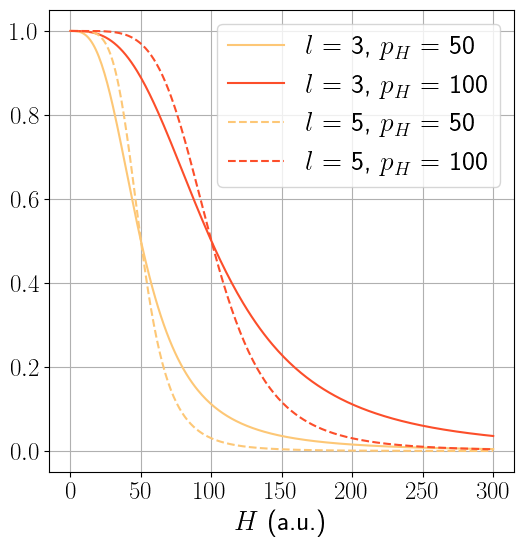

In [3]:
hes = np.linspace(0,300,300)

plt.figure(figsize=(6, 6))
plt.plot(hes, hill_function_negative(hes, 3, 50), label = r'$l$ = 3, $p_H$ = 50', color = hescolor1)
plt.plot(hes, hill_function_negative(hes, 3, 100), label = r'$l$ = 3, $p_H$ = 100', color = hescolor2)
plt.plot(hes, hill_function_negative(hes, 5, 50), label = r'$l$ = 5, $p_H$ = 50', color = hescolor1, linestyle='--')
plt.plot(hes, hill_function_negative(hes, 5, 100), label = r'$l$ = 5, $p_H$ = 100', color = hescolor2, linestyle='--')
plt.xlabel('$H$ (a.u.)', fontsize = 20)
plt.grid()
plt.legend(fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.savefig('theory-hill-funcs.png', dpi=600)

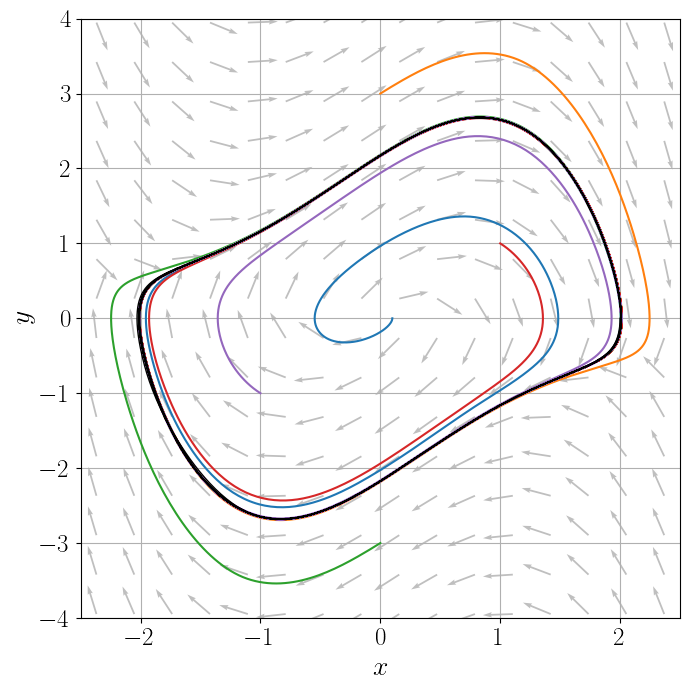

In [5]:
# Van der Pol oscillator parameter
mu = 1.0

def van_der_pol(t, z):
    x, y = z
    dxdt = y
    dydt = mu * (1 - x**2) * y - x
    return [dxdt, dydt]

# Time span for integration
t_span = (0, 50)
t_eval = np.linspace(*t_span, 5000)

# Create figure
fig, ax = plt.subplots(figsize=(7, 7))

# Plot several trajectories starting from different initial points
initial_conditions = [
    [0.1, 0],
    [0, 3],
    [0, -3],
    [1, 1],
    [-1, -1]
]

for z0 in initial_conditions:
    sol = solve_ivp(
        van_der_pol,
        t_span,
        z0,
        t_eval=t_eval
    )
    ax.plot(sol.y[0], sol.y[1], lw=1.5, label=f"IC {z0}")

# Highlight the trajectory starting from [2, 0] as the limit cycle
z0_cycle = [2, 0]
sol_cycle = solve_ivp(
    van_der_pol,
    t_span,
    z0_cycle,
    t_eval=t_eval
)
ax.plot(
    sol_cycle.y[0], sol_cycle.y[1],
    color='black',
    lw=1,
    label='Limit cycle'
)

# Plot vector field arrows
X, Y = np.meshgrid(np.linspace(-3, 3, 20), np.linspace(-5, 5, 20))
U = Y
V = mu * (1 - X**2) * Y - X
N = np.sqrt(U**2 + V**2)
U2, V2 = U/N, V/N  # normalize for direction-only arrows

ax.quiver(
    X, Y, U2, V2,
    angles='xy',
    color='gray',
    alpha=0.5,
    scale=20
)

ax.set_xlabel(r"$x$", fontsize=20)
ax.set_ylabel(r"$y$", fontsize=20)
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-4, 4)
ax.tick_params(axis='both', labelsize=18)
ax.grid()
plt.tight_layout()
# plt.savefig('example_limit_cycle.png', dpi=600, bbox_inches='tight')
plt.show()



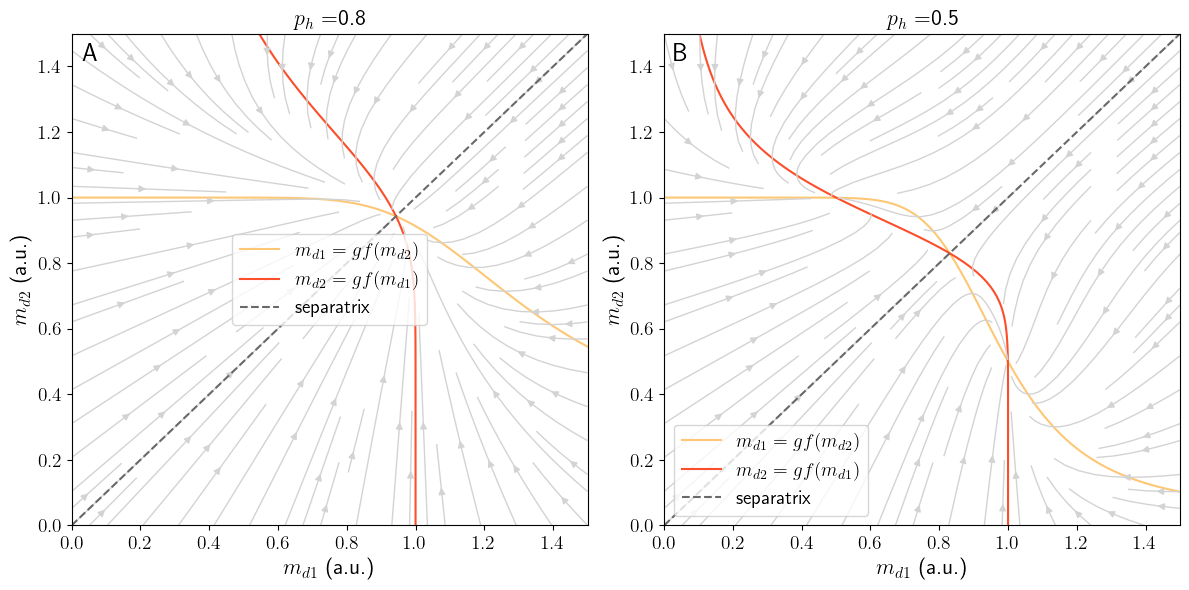

In [ ]:
def gf(d_values, n, l, p_d, p_h):
    f_values = hill_function_positive(d_values, n, p_d)
    gf_values = hill_function_negative(f_values, l, p_h)
    return gf_values

def change_x(x_values, y_values, n, l, p_d, p_h):
    change = gf(y_values, n, l, p_d, p_h) - x_values
    return change

p_hs = [ 0.8, 0.5]
n= 3
l = 5
p_d = 1

hescolor1 = '#fdc776'  # light
hescolor2 = '#fc4e2a'  # dark
hescolor3 = '#8b1a0e'  # dark red with a warm tone
labels = ['A', 'B']
plt.figure(figsize=(12, 6))

for i, p_h in enumerate(p_hs):
    d_values = np.linspace(0, 1.5, 100)
    gf_values = gf(d_values, n, l, p_d, p_h)

    d_values_grid  = np.linspace(0, 1.5, 20)
    X, Y = np.meshgrid(d_values_grid, d_values_grid)

    U = change_x(X, Y, n, l, p_d, p_h)
    V = change_x(Y, X, n, l, p_d, p_h)

    # Normalize the vectors to unit magnitude
    magnitude = np.sqrt(U**2 + V**2)
    # Avoid division by zero
    magnitude[magnitude == 0] = 1  
    U_normalized = U / magnitude
    V_normalized = V / magnitude

    linepoints = [0, 1.5]
    plt.subplot(1, 2, i + 1)
    plt.plot(d_values, gf_values, label=r'$m_{d1} = gf(m_{d2})$', color = hescolor1, lw = 1.5)
    plt.plot(gf_values, d_values, label=r'$m_{d2} = gf(m_{d1})$', color = hescolor2, lw = 1.5)
    plt.quiver(X, Y, U_normalized, V_normalized, color='gray')
    plt.plot(linepoints, linepoints, color='dimgray', ls='--', lw=1.5, label= 'separatrix')
    plt.title(r'$p_h$ ='+ f'{p_h}',fontsize=16)
    plt.legend(fontsize=14)
    plt.xlabel(r'$m_{d1}$ (a.u.)', fontsize=16)
    plt.ylabel(r'$m_{d2}$ (a.u.)', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # Add subplot label
    plt.text(
        0.02, 0.98, labels[i],
        transform=plt.gca().transAxes,
        fontsize=18,
        fontweight='bold',
        va='top',
        ha='left'
    )

plt.tight_layout()
# plt.savefig('two-cell-coupling-phase-plane.png', dpi=600)

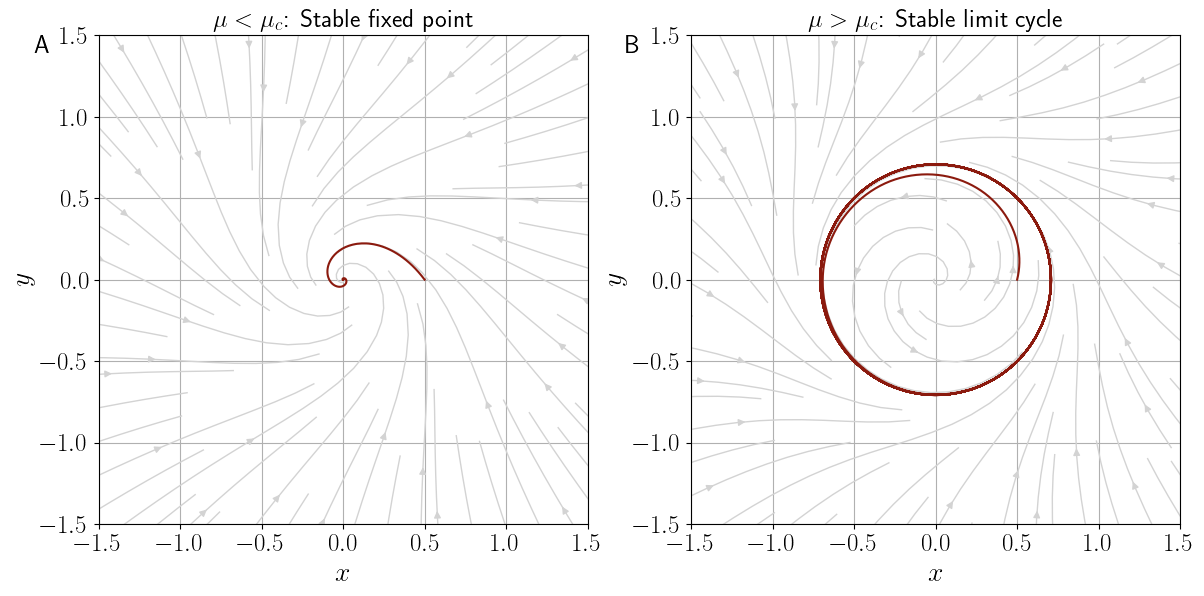

In [7]:
# Define the Hopf bifurcation normal form
def hopf_normal_form(t, z, mu):
    x, y = z
    r2 = x**2 + y**2
    dxdt = mu * x - y - r2 * x
    dydt = x + mu * y - r2 * y
    return [dxdt, dydt]

# Parameters and setup
mus = [-0.5, 0.5]
titles = [r'$\mu < \mu_c$: Stable fixed point', r'$\mu > \mu_c$: Stable limit cycle']
labels = ['A', 'B']
z0 = [0.5, 0.0]
t_span = [0, 100]
t_eval = np.linspace(*t_span, 2000)

# Set up grid for nullclines and vector field
x = np.linspace(-2, 2, 30)
y = np.linspace(-2, 2, 30)
X, Y = np.meshgrid(x, y)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, mu in enumerate(mus):
    # Compute vector field
    R2 = X**2 + Y**2
    U = mu * X - Y - R2 * X
    V = X + mu * Y - R2 * Y

    ax = axes[i]
    ax.streamplot(X, Y, U, V, color='lightgray', density=1, linewidth=1, arrowsize=1)

    # Trajectory
    sol = solve_ivp(hopf_normal_form, t_span, z0, args=(mu,), t_eval=t_eval)
    ax.plot(sol.y[0], sol.y[1], color=hescolor3, label='Trajectory')  # replace 'hescolor3' with a valid color

    # Subplot lettering
    ax.text(-1.9, 1.5, labels[i], fontsize=18, fontweight='bold', va='top', ha='left')

    # Plot settings
    ax.set_title(f"{titles[i]}", fontsize=18)
    ax.set_xlabel('$x$', fontsize=20)
    ax.set_ylabel('$y$', fontsize=20)
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.tick_params(axis='both', labelsize=18)
    ax.grid(True)
    ax.set_aspect('equal')

plt.tight_layout()
# plt.savefig('hopf_bifurcation_phase_plane.png', dpi=600, bbox_inches='tight')
plt.show()

